In [1]:
import matplotlib.pyplot as plt

In [2]:
import torch

In [3]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
import openpyxl
import os

In [4]:
%matplotlib inline

In [5]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
interim_dir = TOP + 'data/interim/'
processed_dir = TOP + 'data/processed/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

In [6]:
new_df4 = pd.read_csv(processed_dir+'icf_rax_pairs.csv', index_col = [0])
new_df4

,Target,Analogue,Label,analogue_smi,target_smi,analogue_mol,target_mol,fps_target,fps_analogue,tanimoto
1,DTXSID4052059,DTXSID8021931,1,CCCCCCO,CC(C)(C)C1=CC(N2N=C3C=CC=CC3=N2)=C(O)C(=C1)C(C...,<rdkit.Chem.rdchem.Mol object at 0x7effa2989dd0>,<rdkit.Chem.rdchem.Mol object at 0x7effa0ccf5f0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.054545
2,DTXSID4052059,DTXSID8021519,1,CCCCOCCOCCO,CC(C)(C)C1=CC(N2N=C3C=CC=CC3=N2)=C(O)C(=C1)C(C...,<rdkit.Chem.rdchem.Mol object at 0x7effa2989660>,<rdkit.Chem.rdchem.Mol object at 0x7effa0ccf6d0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.031250
3,DTXSID4052059,DTXSID50890812,1,[Ca++].CC1=CC=CC(=C1C)S([O-])(=O)=O.CC1=CC=CC(...,CC(C)(C)C1=CC(N2N=C3C=CC=CC3=N2)=C(O)C(=C1)C(C...,<rdkit.Chem.rdchem.Mol object at 0x7effa2989900>,<rdkit.Chem.rdchem.Mol object at 0x7effa0ccf660>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.095238
4,DTXSID4052059,DTXSID40337923,1,CCCCCCCCC(CC)CO,CC(C)(C)C1=CC(N2N=C3C=CC=CC3=N2)=C(O)C(=C1)C(C...,<rdkit.Chem.rdchem.Mol object at 0x7effa2989a50>,<rdkit.Chem.rdchem.Mol object at 0x7effa0ccf740>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.045455
5,DTXSID4052059,DTXSID3027370,1,CO[Si](C)(OC)OC,CC(C)(C)C1=CC(N2N=C3C=CC=CC3=N2)=C(O)C(=C1)C(C...,<rdkit.Chem.rdchem.Mol object at 0x7effa29a44a0>,<rdkit.Chem.rdchem.Mol object at 0x7effa0ccf7b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.040816
...,...,...,...,...,...,...,...,...,...,...
245516,DTXSID601030860,DTXSID00862266,0,CC(O)C=C,CC\C=C(/C)CO,<rdkit.Chem.rdchem.Mol object at 0x7effa0ccf3c0>,<rdkit.Chem.rdchem.Mol object at 0x7effa0169a50>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.125000
245517,DTXSID601030860,DTXSID50560285,1,CCCCCCCCC(CO)CCC,CC\C=C(/C)CO,<rdkit.Chem.rdchem.Mol object at 0x7effa0ccf430>,<rdkit.Chem.rdchem.Mol object at 0x7effa0169ac0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.128205
246013,DTXSID6022008,DTXSID00862266,1,CC(O)C=C,CCCCCCCCCO,<rdkit.Chem.rdchem.Mol object at 0x7effa0ccf4a0>,<rdkit.Chem.rdchem.Mol object at 0x7effa0169b30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.074074
246014,DTXSID6022008,DTXSID50560285,1,CCCCCCCCC(CO)CCC,CCCCCCCCCO,<rdkit.Chem.rdchem.Mol object at 0x7effa0ccf510>,<rdkit.Chem.rdchem.Mol object at 0x7effa0169ba0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.393939


In [7]:
new_df4['analogue_mol'] = [Chem.MolFromSmiles(e) for e in new_df4['analogue_smi']]

new_df4['target_mol'] = [Chem.MolFromSmiles(e) for e in new_df4['target_smi']]

In [8]:
fpgen = AllChem.GetMorganGenerator(radius=3, fpSize=1024)

In [9]:
new_df4['fps_target'] = new_df4['target_mol'].apply(lambda x: fpgen.GetFingerprint(x))
new_df4['fps_analogue'] = new_df4['analogue_mol'].apply(lambda x: fpgen.GetFingerprint(x))

In [10]:
def euclidean_distance(v1, v2):
    return np.linalg.norm(np.array(v1) - np.array(v2))

In [11]:
mylst2 = []
for i, row in new_df4.iterrows():
    mylst2.append(euclidean_distance(row['fps_target'], row['fps_analogue']))

In [12]:
new_df4['Euclidean'] = mylst2

<Axes: >

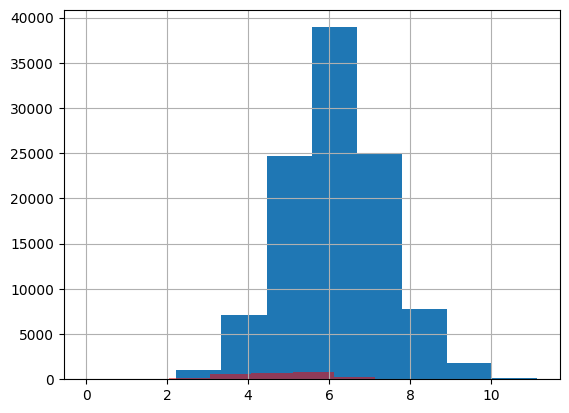

In [13]:
new_df4[new_df4['Label'] ==1]['Euclidean'].hist()
new_df4[new_df4['Label'] ==0]['Euclidean'].hist(color = 'r', alpha = 0.5)

In [14]:
#new_df5 = new_df4.set_index(['Target', 'Analogue'])

In [15]:
#dissimilar_pairs = new_df4[new_df4['Label'] == 1]

In [16]:
#dissimilar_pairs

In [17]:
#similar_pairs = new_df4[new_df4['Label'] == 0]

In [17]:
def farthest_first_traversal(df, k):
  """
  Performs farthest-first traversal on a dataframe to select k diverse target-analogue pairs.

  Args:
      df: A pandas dataframe containing fingerprint columns and target/analogue labels.
      k: The number of target-analogue pairs to select.

  Returns:
      A list of k tuples containing (target_id, analogue_id) for selected pairs.
  """

  # Extract fingerprints and target/analogue IDs
  fps_target = df["fps_target"].tolist()
  fps_analogue = df["fps_analogue"].tolist()
  target_ids = df["Target"].tolist()
  analogue_ids = df["Analogue"].tolist()

  # Function to calculate distance between fingerprints (replace with your metric)
  

  # Select a random initial pair
  centers = [(random.randint(0, len(fps_target)-1), random.randint(0, len(fps_analogue)-1))]

  # Iteratively select farthest pairs
  for _ in range(1, k):
    max_dist = -float('inf')
    farthest_pair = None
    for i in range(len(fps_target)):
      if (i, _) in centers:
        continue  # Skip pairs already chosen

      min_dist = min(euclidean_distance(fps_target[i], center[0]) for center in centers)
      if min_dist > max_dist:
        max_dist = min_dist
        farthest_pair = (i, target_ids.index(df["Target"].iloc[i]))  # Find index by target ID

    # Add farthest pair to selected centers
    centers.append(farthest_pair)

  # Return selected pairs as target-analogue ID tuples
  return [(target_ids[pair[0]], analogue_ids[pair[1]]) for pair in centers]


In [23]:
import random

In [52]:
from sklearn.neighbors import KDTree

def farthest_first_traversal_optimized(df, k):
  """
  Performs farthest-first traversal on a dataframe with KD-Tree optimization.

  Args:
      df: A pandas dataframe containing fingerprint columns and target/analogue labels.
      k: The number of target-analogue pairs to select.

  Returns:
      A list of k tuples containing (target_id, analogue_id) for selected pairs.
  """

  # Extract fingerprints and target/analogue IDs
  fps_target = df["fps_target"].tolist()
  fps_analogue = df["fps_analogue"].tolist()
  target_ids = df["Target"].tolist()
  analogue_ids = df["Analogue"].tolist()

  # Build KD-Tree for target fingerprints
  target_tree = KDTree(fps_target)

  # Function to calculate distance between fingerprints (replace with your metric)
  
  # Select a random initial pair
  centers = [(random.randint(0, len(fps_target)-1), random.randint(0, len(fps_analogue)-1))]

  # Iteratively select farthest pairs
  for _ in range(1, k):
    max_dist = -float('inf')
    farthest_pair = None
    for i in range(len(fps_target)):
      if (i, _) in centers:
        continue  # Skip pairs already chosen

      # Early stopping: estimate lower bound
      lower_bound = euclidean_distance(fps_target[i], fps_target[centers[0][0]])  # Replace with your estimate

      # Check if lower bound is greater than current max distance
      if lower_bound > max_dist:
        continue

      # Efficient nearest neighbor search with KD-Tree
      _, nearest_neighbor_idx = target_tree.query(fps_target[i].reshape(1, -1), k=1, return_distance=True)

      # Skip point if no neighbor found
      if nearest_neighbor_idx is None:
        continue

      # Update max_dist and farthest_pair
      min_dist = nearest_neighbor_idx[0][0]
      if min_dist > max_dist:
        max_dist = min_dist
        farthest_pair = (i, target_ids.index(df["Target"].iloc[i]))

    # Only append valid pairs to centers
    if farthest_pair is not None:
      centers.append(farthest_pair)

  # Return selected pairs as target-analogue ID tuples
  return [(target_ids[pair[0]], analogue_ids[pair[1]]) for pair in centers if pair is not None]


In [57]:
#test = dissimilar_pairs.iloc[:300,:]

In [65]:
#k = len(similar_pairs) # Number of points to select
#diverse_points = farthest_first_traversal_optimized(dissimilar_pairs, k)



In [18]:
new_df4['Label'].value_counts()

Label
1    106563
0      2715
Name: count, dtype: int64

In [19]:
similar_pairs = new_df4[new_df4['Label'] == 0]
dissimilar_pairs = new_df4[new_df4['Label'] == 1]

# Step 2: Downsample dissimilar pairs
downsampled_dissimilar_pairs = dissimilar_pairs.sample(n=len(similar_pairs), replace=False)

# Step 3: Combine balanced pairs
balanced_df = pd.concat([similar_pairs, downsampled_dissimilar_pairs])

# Step 4: Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42)

In [20]:
balanced_df['analogue_mol'] = [Chem.MolFromSmiles(e) for e in balanced_df['analogue_smi']]

balanced_df['target_mol'] = [Chem.MolFromSmiles(e) for e in balanced_df['target_smi']]

In [21]:
balanced_df['Label'].value_counts()

Label
1    2715
0    2715
Name: count, dtype: int64

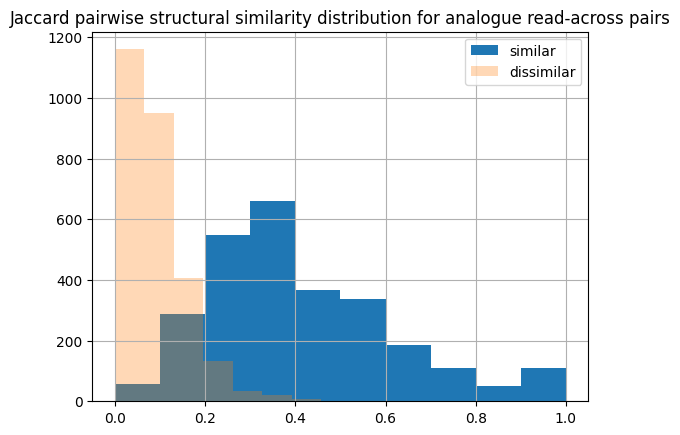

In [23]:
balanced_df[balanced_df['Label'] == 0]['tanimoto'].hist(label = 'similar')
balanced_df[balanced_df['Label'] == 1]['tanimoto'].hist(label = 'dissimilar', alpha = 0.3)
plt.title('Jaccard pairwise structural similarity distribution for analogue read-across pairs')
plt.legend()

<Axes: >

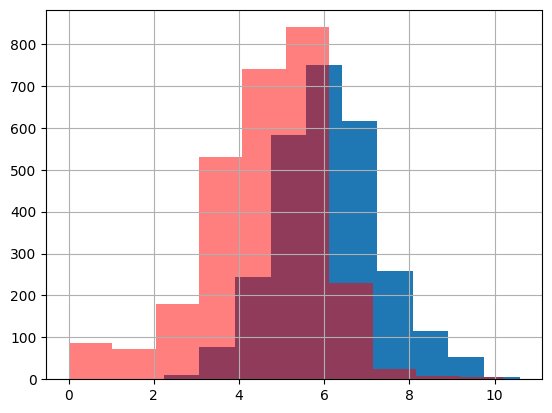

In [66]:
balanced_df[balanced_df['Label'] ==1]['Euclidean'].hist()
balanced_df[balanced_df['Label'] ==0]['Euclidean'].hist(color = 'r', alpha = 0.5)

In [26]:
from sklearn.model_selection import train_test_split
#from kennard_stone import train_test_split
from torch_geometric.loader import DataLoader
from torch.utils.data import Dataset


In [27]:
balanced_df.columns

Index(['Target', 'Analogue', 'Label', 'analogue_smi', 'target_smi',
       'analogue_mol', 'target_mol', 'fps_target', 'fps_analogue', 'tanimoto',
       'Euclidean'],
      dtype='object')

In [125]:
balanced_df.to_csv(interim_dir+'balanced_df_icf_140424.csv')

In [28]:
X_train, X_test, y_train, y_test  = train_test_split(balanced_df[['Target', 	'Analogue','target_smi', 'analogue_smi', 'Label','tanimoto', ]], balanced_df['Label'], stratify = balanced_df['Label'], random_state = 42,test_size=0.2)

In [29]:
y_train.value_counts(normalize = False)

Label
0    2172
1    2172
Name: count, dtype: int64

In [30]:
y_test.value_counts(normalize = True)

Label
1    0.5
0    0.5
Name: proportion, dtype: float64

In [31]:
from torch_geometric.utils import smiles as pygsmi
import torch
import torch_geometric
import torch.nn.functional as F
from torch.nn import Linear
from torch.nn import BatchNorm1d
from torch.utils.data import Dataset
from torch_geometric.nn import GCNConv
from torch_geometric.nn import ChebConv
from torch_geometric.nn import global_add_pool, global_mean_pool
from torch_geometric.loader import DataLoader
import numpy as np

In [32]:


target_X = [pygsmi.from_smiles(m) for m in X_train['target_smi']]

In [33]:
analogue_X = [pygsmi.from_smiles(m) for m in X_train['analogue_smi']]

In [34]:
#X_train

In [35]:
class GraphData(Dataset):
    def __init__(self, df):
        """
        GraphData class inheriting from the Dataset class in PyTorch.

        Parameters
        ----------
    
        node_vec_len : int
            Node vector length of molecular graphs
        max_atoms : int
            Maximum number of atoms in molecular graphs
        """
        self.df = df

        # Create lists
        #self.indices = df.index.to_list()
        #self.smiles = df["smiles"].to_list()
        #self.outputs = df["measured log solubility in mols per litre"].to_list()

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        
        """
        Returns node matrix, adjacency matrix, output, and SMILES string of
        molecule.

        Parameters
        ----------
        i : int
            Dataset index

        Returns
        -------
        node_mat : torch.Tensor with dimension (max_atoms,node_vec_len)
            Node matrix
        adj_mat: torch.Tensor with dimension (max_atoms,max_atoms)
            Adjacency matrix
        output : torch.Tensor with dimension n_outputs
            Output vector
        smile : str
            SMILES string of molecule
        """
        
        row = self.df.iloc[idx]
        target = pygsmi.from_smiles(row['target_smi'])
        analogue =pygsmi.from_smiles(row['analogue_smi'])
        target.x = target.x.float()
        analogue.x = analogue.x.float()


        # Get output
        label = torch.tensor(row['Label'], dtype=torch.long)

        return target, analogue, label

   

In [36]:
train_data = GraphData(X_train)

In [37]:
train_data[0][0].num_features

9

In [38]:
#X_test

In [39]:
test_data = GraphData(X_test)

In [40]:
test_data[3]

(Data(x=[8, 9], edge_index=[2, 16], edge_attr=[16, 3], smiles='ClC1=CC=C(Cl)C=C1'),
 Data(x=[10, 9], edge_index=[2, 20], edge_attr=[20, 3], smiles='ClC1=C(Cl)C(Cl)=C(Cl)C=C1'),
 tensor(0))

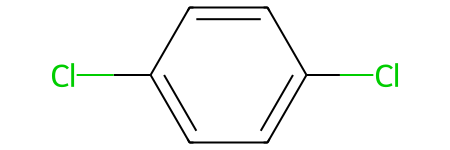

In [41]:
Chem.MolFromSmiles(test_data[3][0]['smiles'])

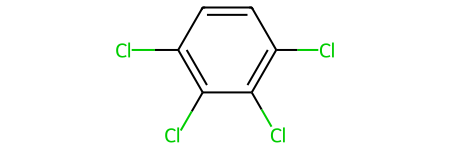

In [42]:
Chem.MolFromSmiles(test_data[3][1]['smiles'])

In [44]:
from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GINConv
from torch_geometric.nn import global_mean_pool, global_add_pool

In [45]:
class GIN(torch.nn.Module):
    """GIN"""
    def __init__(self, dim_h):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(Linear(9, dim_h),
                       BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv2 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv3 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.lin1 = Linear(dim_h*3, dim_h*3)
        #self.lin2 = Linear(dim_h*3, 1)

    def forward_once(self, data, batch=torch.tensor([0])):
        x, edge_index = data.x, data.edge_index
        # Node embeddings 
        h1 = self.conv1(x, edge_index)
        h2 = self.conv2(h1, edge_index)
        h3 = self.conv3(h2, edge_index)

        # Graph-level readout
        h1 = global_add_pool(h1, batch)
        h2 = global_add_pool(h2, batch)
        h3 = global_add_pool(h3, batch)

        # Concatenate graph embeddings
        h = torch.cat((h1, h2, h3), dim=1)

        # Classifier
        #h = self.lin1(h)
        #h = h.relu()
        #h = F.dropout(h, p=0.5, training=self.training)
        #h = self.lin2(h)
        
        return h
       
        
    def forward(self, input1, input2):
       
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)

        return output1, output2
    
    

In [46]:
gin = GIN(dim_h=32)


In [47]:
from torch_geometric.nn.models import GAT, GIN
from torch_geometric.nn import global_mean_pool, global_add_pool, global_max_pool


In [48]:
class ContrastiveLoss(torch.nn.Module):
    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        # Euclidean distance between the embeddings
        euclidean_distance = F.pairwise_distance(output1, output2, keepdim = True)

        # Contrastive loss formula
        contrastive_loss = torch.mean((1 - label) * torch.pow(euclidean_distance, 2) +
                                      (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))

        return contrastive_loss

In [49]:
criterion = ContrastiveLoss()
#optimizer = torch.optim.SGD(params=gin.parameters(), lr=0.005)

optimizer = torch.optim.Adam(gin.parameters(), lr=0.0005)

In [50]:
train_loader = DataLoader(train_data, batch_size=100, shuffle=True, drop_last=True)

In [51]:
test_loader = DataLoader(test_data, batch_size=1, shuffle=False, drop_last=True)

In [52]:
def show_plot(counter,loss):
    plt.plot(counter,loss)
    plt.show()
     

In [53]:
def train_siamese_network(model, train_loader, optimizer, criterion, num_epochs=10):
    
    loss_lst=[]
    counter=[]
    iteration_number = 0
    for epoch in range(1, num_epochs):
        total_loss = 0.0
        model.train()
        for  i, data in enumerate(train_loader,0):
            input1, input2, label = data
            optimizer.zero_grad()
            output1, output2 = model(input1, input2)
            loss = criterion(output1, output2, label)
            #print(loss)
            #total_loss += loss /len(train_loader)
            loss.backward()
            optimizer.step()
        print("Epoch {}\ Current loss {}".format(epoch,loss.item()))
        iteration_number += 10
        counter.append(iteration_number)
        loss_lst.append(loss.item())
        
    show_plot(counter, loss_lst)
        
    return model
   


Epoch 1\ Current loss 7297.5263671875
Epoch 2\ Current loss 7215.0419921875
Epoch 3\ Current loss 2810.721923828125
Epoch 4\ Current loss 9377.7314453125
Epoch 5\ Current loss 1741.3575439453125
Epoch 6\ Current loss 1866.4144287109375
Epoch 7\ Current loss 784.2157592773438
Epoch 8\ Current loss 3166.744384765625
Epoch 9\ Current loss 805.4759521484375
Epoch 10\ Current loss 1027.4219970703125
Epoch 11\ Current loss 630.3260498046875
Epoch 12\ Current loss 1568.172607421875
Epoch 13\ Current loss 701.6467895507812
Epoch 14\ Current loss 893.2691650390625
Epoch 15\ Current loss 198.62646484375
Epoch 16\ Current loss 191.1639862060547
Epoch 17\ Current loss 218.41424560546875
Epoch 18\ Current loss 339.40972900390625
Epoch 19\ Current loss 133.74261474609375
Epoch 20\ Current loss 181.95477294921875
Epoch 21\ Current loss 205.3780517578125
Epoch 22\ Current loss 311.4730529785156
Epoch 23\ Current loss 191.8009796142578
Epoch 24\ Current loss 166.05572509765625
Epoch 25\ Current loss 20

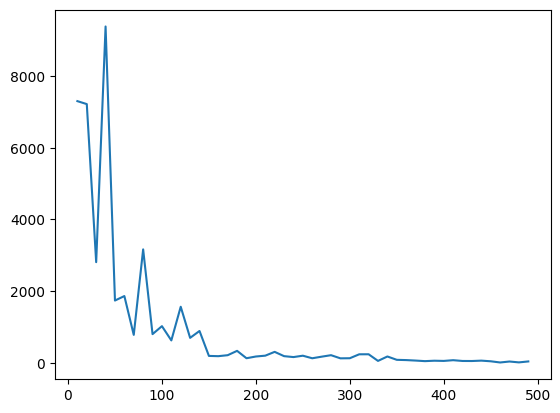

GIN(
  (conv1): GINConv(nn=Sequential(
    (0): Linear(in_features=9, out_features=32, bias=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=32, bias=True)
    (4): ReLU()
  ))
  (conv2): GINConv(nn=Sequential(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=32, bias=True)
    (4): ReLU()
  ))
  (conv3): GINConv(nn=Sequential(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=32, bias=True)
    (4): ReLU()
  ))
  (lin1): Linear(in_features=96, out_features=96, bias=True)
)

In [54]:
train_siamese_network(gin, train_loader, optimizer, criterion, num_epochs=50)

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [83]:
def test_network(model, test_loader, threshold=5):
    true_labels = np.empty((0,))
    predicted_labels = np.empty((0,))
    euclidean = np.empty((0,))
    
    model.eval()
    
    with torch.no_grad():
        for i, data in enumerate(test_loader,0):
            # Unpack data
            input1, input2, label = data
            #print(label)
            
            output1, output2 = model(input1, input2)
            #print(output1, output2)
            euclidean_distance = F.pairwise_distance(output1, output2)
            predictions = (euclidean_distance > threshold).float()
            

            true_labels = np.append(true_labels, label.view(-1).cpu().numpy())
            predicted_labels = np.append(predicted_labels, predictions.view(-1).cpu().numpy())
            euclidean = np.append(euclidean, euclidean_distance.view(-1).cpu().numpy())
            
            #print(input1['smiles'], input2['smiles'], label, euclidean_distance.item())
            
           

    
    

        return true_labels, predicted_labels, euclidean

In [100]:
a, b, c =test_network(gin, test_loader, threshold = 1)

In [101]:
test_data[2]

(Data(x=[4, 9], edge_index=[2, 6], edge_attr=[6, 3], smiles='CC(C)=C'),
 Data(x=[6, 9], edge_index=[2, 10], edge_attr=[10, 3], smiles='CCC=CCO'),
 tensor(1))

In [102]:
a[2], b[2], c[2]

(1.0, 0.0, 0.45941683650016785)

(array([856., 156.,  37.,  18.,   5.,   2.,   2.,   0.,   3.,   7.]),
 array([9.77125183e-06, 1.07357628e+00, 2.14714279e+00, 3.22070930e+00,
        4.29427581e+00, 5.36784231e+00, 6.44140882e+00, 7.51497533e+00,
        8.58854184e+00, 9.66210835e+00, 1.07356749e+01]),
 <BarContainer object of 10 artists>)

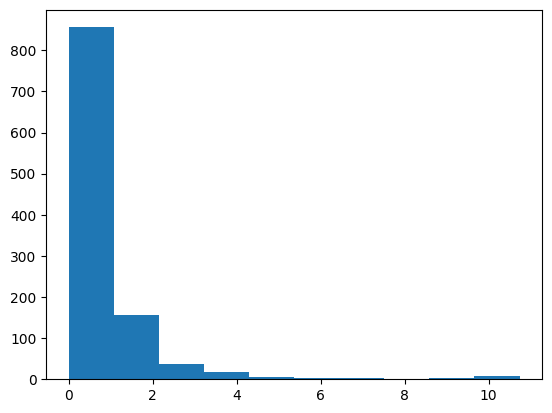

In [103]:
plt.hist(c)

In [104]:
from sklearn.metrics import balanced_accuracy_score,accuracy_score,f1_score, confusion_matrix, recall_score, precision_score

In [121]:
accuracy_score(a, b)

0.6731123388581952

In [122]:
precision = precision_score(a, b)
recall = recall_score(a, b)
f1 = f1_score(a, b)
cm = confusion_matrix(a,b)

In [123]:
print(precision, recall, f1)

0.8884297520661157 0.39594843462246776 0.5477707006369427


In [124]:
print(cm)


[[516  27]
 [328 215]]


In [109]:
new_cols = pd.DataFrame(list(zip(a,b,c)), columns = ['true_label', 'pred_label', 'Euclidean'])


In [117]:
X_test.reset_index(drop = True, inplace =True)

In [118]:
X_test1 = pd.concat([X_test, new_cols], axis = 1)

In [119]:
X_test1

,Target,Analogue,target_smi,analogue_smi,Label,tanimoto,true_label,pred_label,Euclidean
0,DTXSID1026746,DTXSID2021947,CCC=C,CCCCCCCCCCCCCO,1,0.125000,1.0,0.0,0.152989
1,DTXSID40337923,DTXSID0047666,CCCCCCCCC(CC)CO,CCCC(=O)OCC=C,1,0.106383,1.0,0.0,0.498635
2,DTXSID9020748,DTXSID40862700,CC(C)=C,CCC=CCO,1,0.111111,1.0,0.0,0.459417
3,DTXSID1020431,DTXSID6026088,ClC1=CC=C(Cl)C=C1,ClC1=C(Cl)C(Cl)=C(Cl)C=C1,0,0.277778,0.0,0.0,0.893328
4,DTXSID4024012,DTXSID1024128,BrC1=CC=C(Br)C=C1,BrC1=C(Br)C(Br)=C(Br)C(Br)=C1Br,0,0.230769,0.0,1.0,7.270732
...,...,...,...,...,...,...,...,...,...
1081,DTXSID7024320,DTXSID8047763,ClC1=CC(Cl)=C(Cl)C=C1Cl,[S-]C#N,1,0.000000,1.0,1.0,1.415262
1082,DTXSID4026761,DTXSID80168576,COC=C,CNP(=O)(NC)N(C)C,1,0.045455,1.0,1.0,1.424851
1083,DTXSID501015053,DTXSID5026750,CCC(C)(C)CCCC(=O)OCC=C,CCCS,1,0.073171,1.0,0.0,0.765557
1084,DTXSID2027412,DTXSID20194995,CCCCOCCOCCOCCOCCO,CCCCCCCCCC(=O)OCC1=CC=CC=C1,1,0.135593,1.0,1.0,1.283402


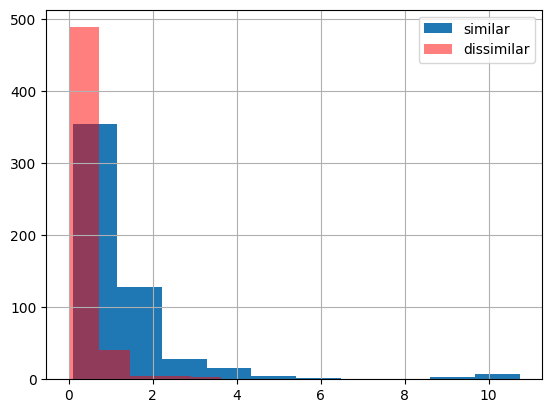

In [120]:
X_test1[X_test1['Label'] ==1]['Euclidean'].hist(label = 'similar')
X_test1[X_test1['Label'] ==0]['Euclidean'].hist(color = 'r', alpha = 0.5, label = 'dissimilar')
plt.legend()